<a href="https://colab.research.google.com/github/jazminmontenegro/Visualizaci-n-de-datos-/blob/main/productos_alimenticios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [165]:
filename = '/content/drive/MyDrive/Colab/sales_predictions (1).csv'
df = pd.read_csv(filename)
corr = df.corr()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?



In [166]:
df.shape

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [167]:
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [168]:
df.duplicated().sum()



0

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [169]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

El código de abajo rellena los valores faltantes en la columna “Item_Weight ” (Peso del articulo) con el valor más común en esa columna.
ventaja
1. No se pierde ningún dato
2. La media es una buena opción para valores flotantes

In [170]:
Item_Weight_df = df['Item_Weight'].median()
df['Item_Weight'].fillna(Item_Weight_df, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

El código de abajo rellena los valores faltantes en la columna “Outlet_Size” (tamaño de salida) 
1. No se pierde ningún dato
2.Rellenar valores faltantes con el valor más común puede ser una buena estrategia si un valor es sumamente más común que los otros valores.  

In [171]:
Outlet_size_pd = df['Outlet_Size'].mode()
df['Outlet_Size'].fillna(Outlet_size_pd[0], inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

6) Confirmen que no hay valores faltantes después de abordarlos.


In [172]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [173]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('reg','Regular')

In [174]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('low fat','Low Fat')

In [175]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('LF','Low Fat')


8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [176]:
#maximo
df.Item_MRP.max()


266.8884

In [177]:
#minimo
df.Item_MRP.min()

31.29

In [178]:
#media 
media=df.Item_MRP.median()


Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo es ayudarlos a comprender los datos en relación con los productos y puntos de ventas que desempeñan un papel crucial en el aumento de ventas.

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

Histograma para ver las distribuciones de diversas características en el conjunto de datos

Histograma para ver las distribuciones de diversas características en el conjunto de datos.

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**En la grafica muestra el tipo de comida en base a grasa con respecto a la categoria del producto donde muestra que algunos productos pueden ser bajos en grasas o dieteticos y otros productos pueden tener grasa regular.**

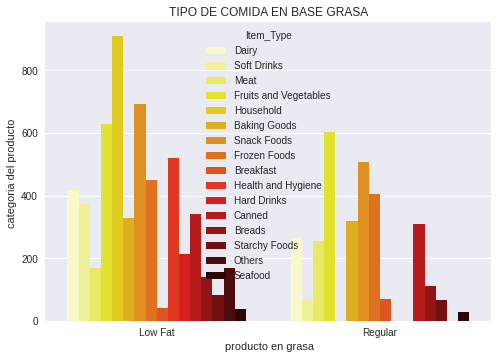

In [180]:
plt.style.use('seaborn')
grafico= sns.countplot(x='Item_Fat_Content', hue='Item_Type',palette='hot_r',data=df)
grafico.set(title='TIPO DE COMIDA EN BASE GRASA', xlabel=' producto en grasa', ylabel='categoria del producto ') 
plt.show()


Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

**Al usar el gráfico este grafico, pueden comparar el rango y distribución de Item_Outlet_Sales para un diagnóstico de ventas del producto en una tienda. Observamos que las tiendas tienen una media particular.**

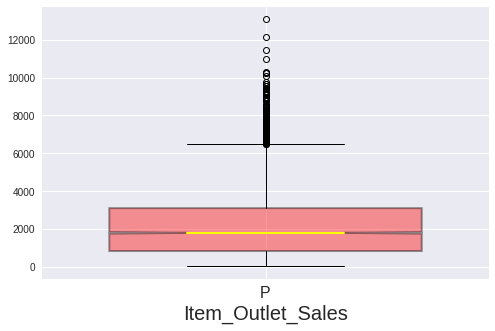

In [181]:

producto_tienda=df['Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([producto_tienda],
           notch = True,
           labels=['P'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item_Outlet_Sales', fontsize = 20);
plt.xticks(fontsize = 16);


Mapa de calor de la correlación entre las características.

**Observen que cada columna numérica se compara con la otra.  Cuando una columna se compara consigo misma, siempre es una perfecta correlación, es por eso que vemos los valores de 1 para Item_Weight con Item_Weight, Item_Visibility con Item_Visibility, Item_MRP con Item_MRP, Outlet_Establishment_Year con Outlet_Establishment_Year y Item_Outlet_Sales con Item_Outlet_Sales.** 

**En general, un coeficiente de correlación más grande que 0,8 se considera “fuerte”.**

**Entre 0,5 y 0,7 se considera “moderado”.** 

**Entre 0,3 y 0,5 se considera una correlación “baja”.**

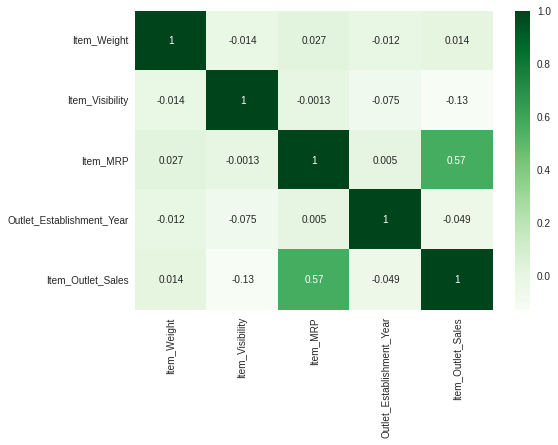

In [182]:
sns.heatmap(corr, cmap = 'Greens',annot=True)

  **Proyecto 1 - Parte 4 (base)**

Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.
Para la cuarta parte, la tarea es crear numerosas visualizaciones de datos para ayudar a las partes interesadas a comprender mejor las tendencias de los datos. No duden en ser creativos esta semana. Esta es su oportunidad para distinguir sus proyectos de otros con visualizaciones y análisis.

• Aprovechen sus limpiezas, exploraciones y análisis anteriores.

• Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos)

• Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.

Comprometan su trabajo en GitHub.
¡Entreguen un enlace a su repositorio de GitHub! Continuaremos trabajando en el proyecto un poco cada semana.

In [76]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [295]:
filtro = df.groupby(['Item_Type'])['Item_Visibility'].nunique()
filtro

Item_Type
Baking Goods              604
Breads                    235
Breakfast                 108
Canned                    617
Dairy                     644
Frozen Foods              806
Fruits and Vegetables    1143
Hard Drinks               198
Health and Hygiene        488
Household                 857
Meat                      406
Others                    160
Seafood                    61
Snack Foods              1133
Soft Drinks               412
Starchy Foods             134
Name: Item_Visibility, dtype: int64

In [296]:
unitem = np.array(filtro.index)
unitem

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [297]:
univisi = np.array(filtro.values)
univisi

array([ 604,  235,  108,  617,  644,  806, 1143,  198,  488,  857,  406,
        160,   61, 1133,  412,  134])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

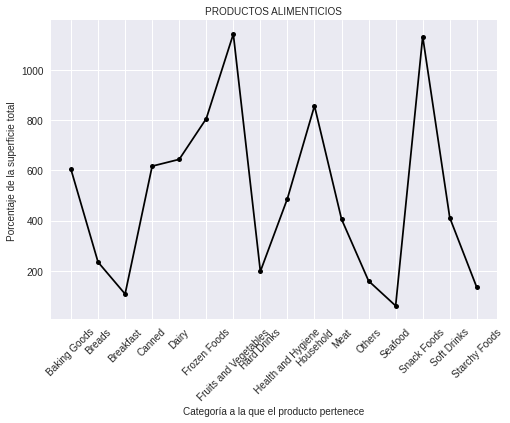

In [312]:
plt.style.use('seaborn')
plt.plot(unitem, univisi, c= 'k',marker = '.', markersize = 10)
plt.xlabel('Categoría del producto', fontsize = 10)
plt.ylabel('Porcentaje de la superficie total', fontsize = 10)
plt.title('PRODUCTOS ALIMENTICIOS', fontsize = 10)
plt.xticks(rotation = 45)


En la grafica de arriba muestra la categoría del producto a la que pertenece y Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto donde muestra que hay algunos productos que casi no se muestran como se puedo observa en la grafica, un ejemplo seafood que esta por debajo de los 200 o frozen food que esta por encima de los 1000.

In [327]:
filtro1 = df.groupby(['Item_Type'])['Item_Outlet_Sales'].nunique()
filtro1

Item_Type
Baking Goods             536
Breads                   228
Breakfast                107
Canned                   558
Dairy                    571
Frozen Foods             698
Fruits and Vegetables    995
Hard Drinks              195
Health and Hygiene       442
Household                764
Meat                     381
Others                   152
Seafood                   55
Snack Foods              929
Soft Drinks              377
Starchy Foods            135
Name: Item_Outlet_Sales, dtype: int64

In [325]:
unitem1 = np.array(filtro1.index)
unitem1

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [323]:
univalor = np.array(filtro1.values)
univalor

array([536, 228, 107, 558, 571, 698, 995, 195, 442, 764, 381, 152,  55,
       929, 377, 135])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

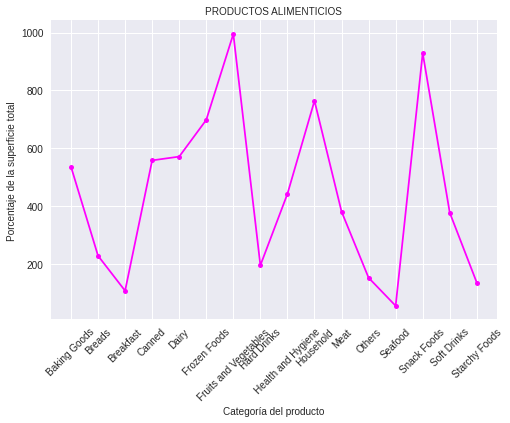

In [326]:
plt.style.use('seaborn')
plt.plot(unitem1, univalor, c='magenta',marker = '.', markersize = 10)
plt.xlabel('Categoría del producto', fontsize = 10)
plt.ylabel('Porcentaje de la superficie total', fontsize = 10)
plt.title('PRODUCTOS ALIMENTICIOS', fontsize = 10)
plt.xticks(rotation = 45)



En la grafica de arriba muestra la categoría del producto a la que pertenece y Ventas los productos donde lo que mas se vende Fruits and Vegetables que esta por el 1000 y lo que menos se vende es Seafood que esta mas abajo de los 200.

